In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def weight_from_node_quantity(node_quantity):
    a, b = 1, 2
    for _ in range(node_quantity):
        yield a
        a, b = b, a + b + 1

In [3]:
number = 25
node_quantity = np.arange(1, number + 1)

In [4]:
cumulative_weights = np.array(list(weight_from_node_quantity(number)))

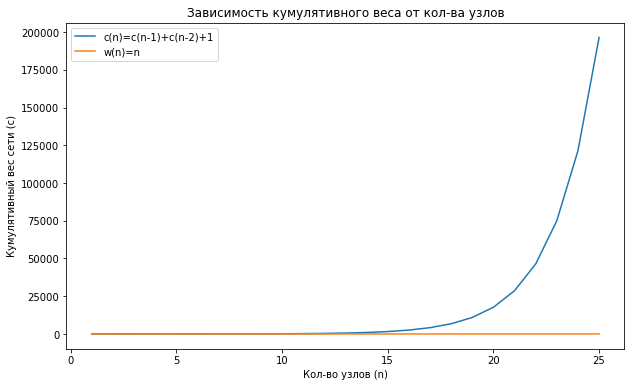

In [5]:
plt.figure(figsize=(10,6))
plt.title('Зависимость кумулятивного веса от кол-ва узлов')
plt.plot(node_quantity, cumulative_weights, label='c(n)=c(n-1)+c(n-2)+1')
plt.plot(node_quantity, node_quantity, label='w(n)=n')
plt.legend(loc='upper left')
plt.xlabel('Кол-во узлов (n)')
plt.ylabel('Кумулятивный вес сети (c)')
plt.show()

In [6]:
distribution_coef = 1 - node_quantity / cumulative_weights

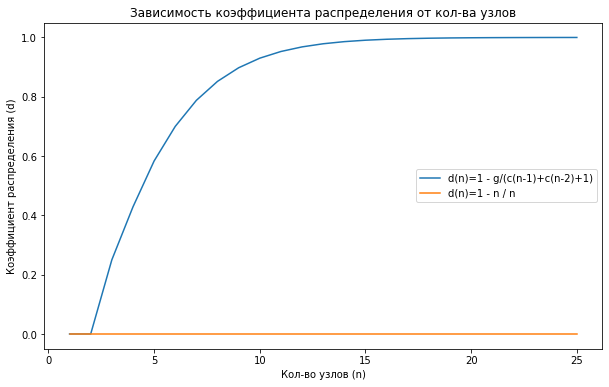

In [7]:
plt.figure(figsize=(10,6))
plt.title('Зависимость коэффициента распределения от кол-ва узлов')
plt.plot(node_quantity, distribution_coef, label='d(n)=1 - g/(c(n-1)+c(n-2)+1)')
plt.plot(node_quantity, 1 - node_quantity / node_quantity, label='d(n)=1 - n / n')
plt.legend(loc='center right')
plt.xlabel('Кол-во узлов (n)')
plt.ylabel('Коэффициент распределения (d)')
plt.show()

In [8]:
def count_distribute_coef(nodes_q, weight):
    return 1 - nodes_q / weight

In [9]:
def get_exp_info(path):
    folders = [name for name in os.listdir(path)]
    weights = list()
    paths = list()
    for folder in folders:
        if folder == '.DS_Store':
            continue
        weights.append(pd.read_csv(path+'/'+folder+'/weights.csv', sep=';'))
        paths.append(pd.read_csv(path+'/'+folder+'/paths.csv', sep=';'))
    return weights, paths

In [10]:
ascon_path = "/Users/a.g.andreev/tangle-simulation/experiments/ascon"
ascon_weights, ascon_paths = get_exp_info(ascon_path)

In [11]:
photonbeetle_path = "/Users/a.g.andreev/tangle-simulation/experiments/photonbeetle"
photonbeetle_weights, photonbeetle_paths = get_exp_info(photonbeetle_path)

In [12]:
romulus_path = "/Users/a.g.andreev/tangle-simulation/experiments/romulus"
romulus_weights, romulus_paths = get_exp_info(romulus_path)

In [13]:
sparkle_path = "/Users/a.g.andreev/tangle-simulation/experiments/sparkle"
sparkle_weights, sparkle_paths = get_exp_info(sparkle_path)

In [14]:
xoodyak_path = "/Users/a.g.andreev/tangle-simulation/experiments/xoodyak"
xoodyak_weights, xoodyak_paths = get_exp_info(xoodyak_path)

# Коэффициент распределения сети

In [15]:
def net_distribution_research(weights, limit):
    rows = list()
    for weight in weights:
        display(weight.head())
        nodes_q = len(weight)
        ttl_weight = int(weight[weight["id"]==0]["weight"])
        distribution_coef = count_distribute_coef(nodes_q, ttl_weight)
        print(f"nodes={nodes_q}\t ttl_weight={ttl_weight}\t distribute_coef={distribution_coef}\t valid={distribution_coef >= limit}")
        rows.append((nodes_q, ttl_weight, distribution_coef, distribution_coef >= limit))
    return pd.DataFrame(rows, columns=('node_count', 'total_weight', 'distribution_coef', 'is_valid'))

### ASCON

In [16]:
limit_coef = 1 - 69 / 263
ascon_df = net_distribution_research(ascon_weights, limit_coef)

id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681321866491  1681321866491     454        1.00   
1   1         0  3521467  1681321866491  1681321879382      12        0.34   
2   2         3  3964347  1681321866491  1681321879382      21        0.63   
3   3         2  2518352  1681321866491  1681321876491      53        0.92   
4   4         4   547269  1681321866491  1681321867108      59        0.95   

       x     y  
0   0.00  0.00  
1  20.89  0.68  
2  20.89 -3.19  
3  16.21 -2.07  
4   1.00 -4.93

nodes=69	 ttl_weight=454	 distribute_coef=0.8480176211453745	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681322131712  1681322131712     291        1.00   
1   1         3   1472659  1681322131712  1681322141713       7        0.24   
2   2         0  15992628  1681322131712  1681322153428       5        0.11   
3   3         4   2015835  1681322131712  1681322141713      26        0.53   
4   4         1    111771  1681322131712  1681322131820      20        0.58   

        x     y  
0    0.00  0.00  
1   93.47 -3.30  
2  202.94  0.05  
3   93.47 -4.74  
4    1.00 -1.22

nodes=72	 ttl_weight=291	 distribute_coef=0.7525773195876289	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322207010  1681322207010     428        1.00   
1   1         2  3801897  1681322207011  1681322218762      16        0.49   
2   2         4   518682  1681322207011  1681322207597      52        0.80   
3   3         0  2977508  1681322207011  1681322217766       9        0.16   
4   4         1   229236  1681322207011  1681322207253      20        0.51   

       x     y  
0   0.00  0.00  
1  48.56 -1.72  
2   2.42 -4.44  
3  44.44  0.53  
4   1.00 -0.78

nodes=73	 ttl_weight=428	 distribute_coef=0.8294392523364487	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681321942010  1681321942010     420        1.00   
1   1         0    313462  1681321942011  1681321942369      33        0.61   
2   2         2   2698298  1681321942011  1681321952011      36        0.66   
3   3         1  12203437  1681321942011  1681321962950      35        0.66   
4   4         3   4279089  1681321942011  1681321953809      55        0.96   

       x     y  
0   0.00  0.00  
1   1.00  0.22  
2  27.93 -1.96  
3  58.49 -1.15  
4  32.95 -3.64

nodes=68	 ttl_weight=420	 distribute_coef=0.8380952380952381	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322023802  1681322023802     456        1.00   
1   1         4  1472448  1681322023802  1681322033802      21        0.72   
2   2         1   886444  1681322023802  1681322024896      94        0.93   
3   3         0  8092952  1681322023802  1681322040207      25        0.59   
4   4         2  3200737  1681322023802  1681322033802      33        0.73   

       x     y  
0   0.00  0.00  
1   9.14 -5.06  
2   1.00 -1.03  
3  15.00  0.56  
4   9.14 -2.52

nodes=63	 ttl_weight=456	 distribute_coef=0.8618421052631579	 valid=True


In [17]:
ascon_df

node_count  total_weight  distribution_coef  is_valid
0          69           454           0.848018      True
1          72           291           0.752577      True
2          73           428           0.829439      True
3          68           420           0.838095      True
4          63           456           0.861842      True

In [18]:
ascon_df.describe()

node_count  total_weight  distribution_coef
count    5.000000      5.000000           5.000000
mean    69.000000    409.800000           0.825994
std      3.937004     68.258333           0.042774
min     63.000000    291.000000           0.752577
25%     68.000000    420.000000           0.829439
50%     69.000000    428.000000           0.838095
75%     72.000000    454.000000           0.848018
max     73.000000    456.000000           0.861842

### PHOTON Beetle

In [19]:
limit_coef = 1 - 22 / 67
photonbeetle_df = net_distribution_research(photonbeetle_weights, limit_coef)

id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323151516  1681323151516     159        1.00   
1   1         3  3687737  1681323151516  1681323168122      78        1.00   
2   2         2   413578  1681323151516  1681323153575      79        1.00   
3   3         4   753296  1681323151516  1681323155210      79        1.00   
4   4         0  4020234  1681323151516  1681323178123      15        0.93   

       x     y  
0   0.00  0.00  
1   8.07 -3.84  
2   1.00 -2.39  
3   1.79 -4.56  
4  12.93  0.67

nodes=31	 ttl_weight=159	 distribute_coef=0.8050314465408805	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323479195  1681323479195      89         1.0   
1   1         1  3783648  1681323479195  1681323495706      41         1.0   
2   2         2  1259688  1681323479195  1681323484993      44         1.0   
3   3         4  4155838  1681323479195  1681323497362      40         1.0   
4   4         0   570125  1681323479195  1681323481638      44         1.0   

      x     y  
0  0.00  0.00  
1  6.76 -1.19  
2  2.37 -1.61  
3  7.44 -4.86  
4  1.00  0.17

nodes=23	 ttl_weight=89	 distribute_coef=0.7415730337078652	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322831777  1681322831777      55         1.0   
1   1         2  1384855  1681322831777  1681322838256      54         1.0   
2   2         0  4044002  1681322831777  1681322850045      50         1.0   
3   3         3  3819060  1681322831777  1681322849136      51         1.0   
4   4         1  3484555  1681322831777  1681322847735      52         1.0   

      x     y  
0  0.00  0.00  
1  1.00 -2.07  
2  2.82  0.81  
3  2.68 -3.84  
4  2.46 -1.08

nodes=21	 ttl_weight=55	 distribute_coef=0.6181818181818182	 valid=False


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681323004687  1681323004687      69         1.0   
1   1         1   1850902  1681323004688  1681323014689      11         1.0   
2   2         2  19501779  1681323004688  1681323088854       2         1.0   
3   3         3   1618696  1681323004688  1681323012183      28         1.0   
4   4         4    116716  1681323004688  1681323005186      18         1.0   

        x     y  
0    0.00  0.00  
1   20.08 -1.12  
2  169.01 -2.47  
3   15.05 -3.45  
4    1.00 -4.61

nodes=18	 ttl_weight=69	 distribute_coef=0.7391304347826086	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681323273942  1681323273942      52         1.0   
1   1         0  10753032  1681323273943  1681323321294       6         1.0   
2   2         2    718306  1681323273943  1681323283943       3         1.0   
3   3         3     69541  1681323273943  1681323274226      12         1.0   
4   4         1   9781139  1681323273943  1681323317047       7         1.0   

        x     y  
0    0.00  0.00  
1  166.73  0.17  
2   35.21 -2.39  
3    1.00 -3.43  
4  151.77 -1.19

nodes=19	 ttl_weight=52	 distribute_coef=0.6346153846153846	 valid=False


In [20]:
display(photonbeetle_df)
photonbeetle_df.describe()

node_count  total_weight  distribution_coef  is_valid
0          31           159           0.805031      True
1          23            89           0.741573      True
2          21            55           0.618182     False
3          18            69           0.739130      True
4          19            52           0.634615     False

node_count  total_weight  distribution_coef
count    5.000000      5.000000           5.000000
mean    22.400000     84.800000           0.707706
std      5.176872     43.979541           0.078999
min     18.000000     52.000000           0.618182
25%     19.000000     55.000000           0.634615
50%     21.000000     69.000000           0.739130
75%     23.000000     89.000000           0.741573
max     31.000000    159.000000           0.805031

# Romulus

In [21]:
limit_coef = 1 - 40 / 190
romulus_df = net_distribution_research(romulus_weights, limit_coef)

id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681634209968  1681634209968     598        1.00   
1   1         0  2522392  1681634209969  1681634214683     152        0.96   
2   2         2  6434098  1681634209969  1681634225524      25        0.74   
3   3         1  4394109  1681634209969  1681634219970     120        0.96   
4   4         3  3369494  1681634209969  1681634219970      87        0.96   

      x     y  
0  0.00  0.00  
1  1.00  0.88  
2  3.30 -1.87  
3  2.12 -0.91  
4  2.12 -3.36

nodes=41	 ttl_weight=598	 distribute_coef=0.931438127090301	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681634103832  1681634103832     267        1.00   
1   1         0  1239876  1681634103832  1681634113833      36        0.91   
2   2         3  1542351  1681634103832  1681634115160      71        1.00   
3   3         4  3769641  1681634103832  1681634115160      35        0.92   
4   4         1   681509  1681634103832  1681634105159      48        0.91   

      x     y  
0  0.00  0.00  
1  7.54  0.31  
2  8.54 -3.50  
3  8.54 -4.86  
4  1.00 -1.22

nodes=38	 ttl_weight=267	 distribute_coef=0.8576779026217228	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681634290085  1681634290085     864         1.0   
1   1         1   8502354  1681634290086  1681634304990     225         1.0   
2   2         2   2242670  1681634290086  1681634294240     124         1.0   
3   3         4  12330096  1681634290086  1681634314992      42         1.0   
4   4         0   3133493  1681634290086  1681634300086     226         1.0   

      x     y  
0  0.00  0.00  
1  3.59 -0.62  
2  1.00 -2.26  
3  6.00 -4.98  
4  2.41  0.71

nodes=37	 ttl_weight=864	 distribute_coef=0.9571759259259259	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681634491806  1681634491806     654         1.0   
1   1         4  1911165  1681634491807  1681634495463     200         1.0   
2   2         0  3556766  1681634491807  1681634501807     126         1.0   
3   3         3  4122840  1681634491807  1681634501807     200         1.0   
4   4         1  5727858  1681634491807  1681634502843     199         1.0   

      x     y  
0  0.00  0.00  
1  1.15 -5.09  
2  3.14  0.29  
3  3.14 -3.29  
4  3.47 -0.61

nodes=44	 ttl_weight=654	 distribute_coef=0.9327217125382263	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681634372332  1681634372332     351         1.0   
1   1         0   573707  1681634372332  1681634373442      66         1.0   
2   2         3   758240  1681634372332  1681634373792     113         1.0   
3   3         4  3214114  1681634372332  1681634383442      50         1.0   
4   4         1  1375395  1681634372333  1681634382334      48         1.0   

       x     y  
0   0.00  0.00  
1   1.00  0.86  
2   1.32 -3.19  
3  10.02 -4.53  
4   9.02 -1.19

nodes=44	 ttl_weight=351	 distribute_coef=0.8746438746438746	 valid=True


In [22]:
display(romulus_df)
romulus_df.describe()

node_count  total_weight  distribution_coef  is_valid
0          41           598           0.931438      True
1          38           267           0.857678      True
2          37           864           0.957176      True
3          44           654           0.932722      True
4          44           351           0.874644      True

node_count  total_weight  distribution_coef
count    5.000000      5.000000           5.000000
mean    40.800000    546.800000           0.910732
std      3.271085    240.496778           0.042386
min     37.000000    267.000000           0.857678
25%     38.000000    351.000000           0.874644
50%     41.000000    598.000000           0.931438
75%     44.000000    654.000000           0.932722
max     44.000000    864.000000           0.957176

### SPARKLE

In [23]:
limit_coef = 1 - 70 / 298
display(f'limit coef={limit_coef}')
sparkle_df = net_distribution_research(sparkle_weights, limit_coef)

'limit coef=0.7651006711409396'

id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322605374  1681322605374     350        1.00   
1   1         4  1242204  1681322605375  1681322606824      61        0.85   
2   2         0  9334010  1681322605375  1681322620894      11        0.25   
3   3         2  2536415  1681322605375  1681322616825      73        0.90   
4   4         3  3514343  1681322605375  1681322617021      19        0.46   

       x     y  
0   0.00  0.00  
1   1.00 -5.16  
2  10.71  0.13  
3   7.90 -2.16  
4   8.04 -3.29

nodes=74	 ttl_weight=350	 distribute_coef=0.7885714285714286	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681322509311  1681322509311     354        1.00   
1   1         0  10293579  1681322509311  1681322528486      27        0.54   
2   2         4   8353736  1681322509311  1681322519892      50        0.95   
3   3         3    900564  1681322509311  1681322510364     111        1.00   
4   4         1    484511  1681322509311  1681322509891      28        0.67   

       x     y  
0   0.00  0.00  
1  33.06  0.41  
2  18.24 -4.23  
3   1.82 -3.04  
4   1.00 -0.61

nodes=66	 ttl_weight=354	 distribute_coef=0.8135593220338984	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322434467  1681322434467     301        1.00   
1   1         2  7623705  1681322434467  1681322446476       7        0.44   
2   2         3   254270  1681322434467  1681322434770      21        0.47   
3   3         4   368659  1681322434467  1681322434911       3        0.11   
4   4         0  1632744  1681322434467  1681322445556      10        0.39   

       x     y  
0   0.00  0.00  
1  39.63 -2.52  
2   1.00 -3.37  
3   1.47 -4.94  
4  36.60  0.76

nodes=71	 ttl_weight=301	 distribute_coef=0.7641196013289037	 valid=False


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322697426  1681322697426     332        1.00   
1   1         4  1660978  1681322697426  1681322707427      46        0.55   
2   2         2   979885  1681322697426  1681322698625      26        0.55   
3   3         0  2626134  1681322697426  1681322707427      17        0.44   
4   4         1   306912  1681322697426  1681322697798      35        0.68   

       x     y  
0   0.00  0.00  
1  26.88 -4.87  
2   3.22 -1.91  
3  26.88  0.10  
4   1.00 -0.53

nodes=74	 ttl_weight=332	 distribute_coef=0.7771084337349398	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681322342627  1681322342627     286        1.00   
1   1         4   964723  1681322342627  1681322343786       8        0.36   
2   2         1  1137935  1681322342627  1681322352628      17        0.40   
3   3         2  2531496  1681322342627  1681322353968      19        0.72   
4   4         0   523458  1681322342627  1681322343254      12        0.47   

       x     y  
0   0.00  0.00  
1   1.85 -4.92  
2  15.95 -0.76  
3  18.09 -1.96  
4   1.00  0.61

nodes=67	 ttl_weight=286	 distribute_coef=0.7657342657342657	 valid=True


In [24]:
display(sparkle_df)
sparkle_df.describe()

node_count  total_weight  distribution_coef  is_valid
0          74           350           0.788571      True
1          66           354           0.813559      True
2          71           301           0.764120     False
3          74           332           0.777108      True
4          67           286           0.765734      True

node_count  total_weight  distribution_coef
count    5.000000       5.00000           5.000000
mean    70.400000     324.60000           0.781819
std      3.781534      30.04663           0.020293
min     66.000000     286.00000           0.764120
25%     67.000000     301.00000           0.765734
50%     71.000000     332.00000           0.777108
75%     74.000000     350.00000           0.788571
max     74.000000     354.00000           0.813559

### Xoodyak

In [25]:
limit_coef = 1 - 72 / 298
display(f'limit coef={limit_coef}')
xoodyak_df = net_distribution_research(xoodyak_weights, limit_coef)

'limit coef=0.7583892617449665'

id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323720443  1681323720443     300        1.00   
1   1         0  2388103  1681323720444  1681323730444      20        0.44   
2   2         4  5113036  1681323720444  1681323732890      26        0.68   
3   3         2  4778371  1681323720444  1681323732890      27        0.65   
4   4         3  1628247  1681323720444  1681323722135      16        0.42   

       x     y  
0   0.00  0.00  
1  61.35  0.12  
2  76.36 -4.93  
3  76.36 -2.19  
4  10.37 -3.47

nodes=77	 ttl_weight=300	 distribute_coef=0.7433333333333334	 valid=False


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323942416  1681323942416     354        1.00   
1   1         3  7773429  1681323942416  1681323954927      17        0.48   
2   2         0  4780571  1681323942416  1681323952417      29        0.72   
3   3         2  2567449  1681323942416  1681323944926      30        0.58   
4   4         1  5641712  1681323942416  1681323954927      22        0.43   

      x     y  
0  0.00  0.00  
1  4.98 -2.97  
2  3.98  0.75  
3  1.00 -1.82  
4  4.98 -1.14

nodes=76	 ttl_weight=354	 distribute_coef=0.7853107344632768	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323642905  1681323642905     443        1.00   
1   1         4  5557016  1681323642905  1681323653254      58        0.92   
2   2         2  4153749  1681323642905  1681323653254      10        0.33   
3   3         3   443782  1681323642905  1681323652905      24        0.60   
4   4         0  5572239  1681323642905  1681323653254      19        0.42   

       x     y  
0   0.00  0.00  
1  29.82 -4.48  
2  29.82 -1.65  
3  28.82 -3.70  
4  29.82  0.18

nodes=75	 ttl_weight=443	 distribute_coef=0.8306997742663657	 valid=True


id  agent_id    nonce  time_creation     time_edged  weight  confidence  \
0   0         0        0  1681323794574  1681323794574     345        1.00   
1   1         0  2718295  1681323794575  1681323797429      32        0.65   
2   2         3  4358971  1681323794575  1681323806772      30        0.73   
3   3         4  6438475  1681323794574  1681323806772       4        0.27   
4   4         1  2093159  1681323794575  1681323796771      68        0.85   

      x     y  
0  0.00  0.00  
1  1.30  0.41  
2  5.55 -3.85  
3  5.55 -4.76  
4  1.00 -1.26

nodes=67	 ttl_weight=345	 distribute_coef=0.8057971014492753	 valid=True


id  agent_id     nonce  time_creation     time_edged  weight  confidence  \
0   0         0         0  1681323868318  1681323868318     371        1.00   
1   1         0   5451997  1681323868318  1681323878319      33        0.66   
2   2         1   6937042  1681323868318  1681323883843      12        0.40   
3   3         4  20907504  1681323868318  1681323889980      17        0.47   
4   4         2   2138821  1681323868318  1681323870608      38        0.60   

      x     y  
0  0.00  0.00  
1  4.37  0.55  
2  6.78 -1.19  
3  9.46 -4.48  
4  1.00 -2.60

nodes=67	 ttl_weight=371	 distribute_coef=0.8194070080862533	 valid=True


In [26]:
display(xoodyak_df)
xoodyak_df.describe()

node_count  total_weight  distribution_coef  is_valid
0          77           300           0.743333     False
1          76           354           0.785311      True
2          75           443           0.830700      True
3          67           345           0.805797      True
4          67           371           0.819407      True

node_count  total_weight  distribution_coef
count     5.00000      5.000000           5.000000
mean     72.40000    362.600000           0.796910
std       4.97996     52.050937           0.034394
min      67.00000    300.000000           0.743333
25%      67.00000    345.000000           0.785311
50%      75.00000    354.000000           0.805797
75%      76.00000    371.000000           0.819407
max      77.00000    443.000000           0.830700

In [27]:
dfs = [ascon_df, photonbeetle_df, romulus_df, sparkle_df, xoodyak_df]
rows = list()
for df in dfs:
    dfd = df.describe()
    rows.append((dfd["node_count"].loc["mean"], 
                dfd["node_count"].loc["std"], 
                dfd["total_weight"].loc["mean"], 
                dfd["total_weight"].loc["std"],
                dfd["distribution_coef"].loc["mean"], 
                dfd["distribution_coef"].loc["std"],
                len(df[df["is_valid"]==False])
               ))

total_df = pd.DataFrame(rows, columns=('mean_node_count', 'std_node_count', 'maen_total_weight', 'std_total_weight', 'maen_distribution_coef', 'std_distribution_coef', 'invalid_count'))
total_df.insert(loc=0, column='name', value=['ASCON', 'PHOTON_Beetle', 'Romulus', 'SPARKLE', 'Xoodyak'])

In [28]:
total_df

name  mean_node_count  std_node_count  maen_total_weight  \
0          ASCON             69.0        3.937004              409.8   
1  PHOTON_Beetle             22.4        5.176872               84.8   
2        Romulus             40.8        3.271085              546.8   
3        SPARKLE             70.4        3.781534              324.6   
4        Xoodyak             72.4        4.979960              362.6   

   std_total_weight  maen_distribution_coef  std_distribution_coef  \
0         68.258333                0.825994               0.042774   
1         43.979541                0.707706               0.078999   
2        240.496778                0.910732               0.042386   
3         30.046630                0.781819               0.020293   
4         52.050937                0.796910               0.034394   

   invalid_count  
0              0  
1              2  
2              0  
3              1  
4              1

# Исследования распределения путей

In [29]:
def get_distribution_array(path):
    array = list()
    for index, row in path.iterrows():
        array += int(row["quantity"]) * [int(row["length"])]
    return np.array(array)

def plot_paths(paths):
    bins = np.linspace(0, 10, 20)

    hists = list()
    labels = list()
    rows = list()
    for i, path in enumerate(paths):
        dist = get_distribution_array(path)
        rows.append((i, dist.mean(), dist.std()))
        hists.append(dist)
        labels.append(i)
        
    plt.figure(figsize=(10,6))
    plt.title("Распределение количества длин путей")
    plt.hist(hists, bins, label=labels)
    plt.xlabel('Длина пути')
    plt.ylabel('Количество путей')
    plt.legend(loc='upper right')
    plt.show()
    
    return pd.DataFrame(rows, columns=('model_number', 'mean', 'std'))

### ASCON

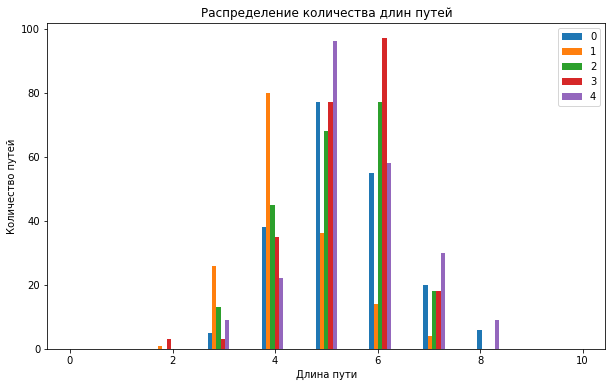

model_number      mean       std
0             0  5.323383  1.060320
1             1  4.298137  0.944712
2             2  5.190045  1.037789
3             3  5.356223  0.957091
4             4  5.468750  1.093367

In [30]:
ascon_paths_df = plot_paths(ascon_paths)
ascon_paths_df

In [31]:
ascon_paths_df["std"].describe()

count    5.000000
mean     1.018656
std      0.065080
min      0.944712
25%      0.957091
50%      1.037789
75%      1.060320
max      1.093367
Name: std, dtype: float64

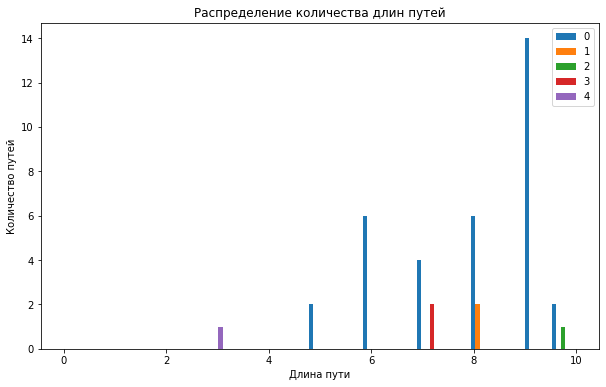

model_number       mean       std
0             0   7.882353  1.409312
1             1  13.600000  3.006659
2             2  13.454545  1.776802
3             3  10.142857  2.030381
4             4  10.200000  3.600000

In [32]:
photonbeetle_paths_df = plot_paths(photonbeetle_paths)
photonbeetle_paths_df

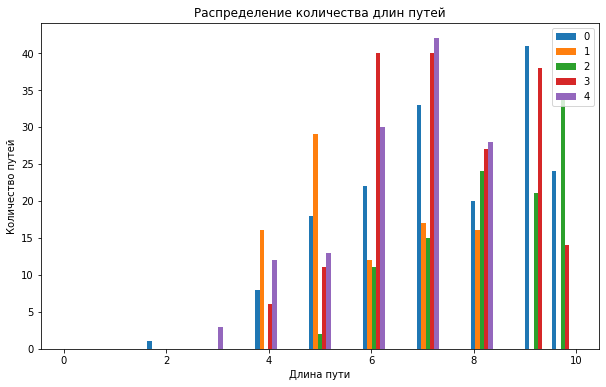

model_number      mean       std
0             0  7.520958  1.807630
1             1  5.866667  1.384036
2             2  9.893617  2.062678
3             3  7.450000  1.616838
4             4  6.406250  1.313616

In [33]:
romulus_paths_df = plot_paths(romulus_paths)
romulus_paths_df

In [34]:
romulus_paths_df["std"].describe()

count    5.000000
mean     1.636960
std      0.307933
min      1.313616
25%      1.384036
50%      1.616838
75%      1.807630
max      2.062678
Name: std, dtype: float64

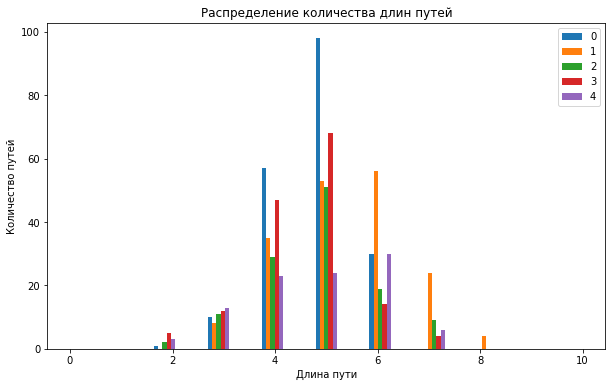

model_number      mean       std
0             0  4.744898  0.792969
1             1  5.361111  1.134136
2             2  4.834711  1.085952
3             3  4.573333  0.975340
4             4  4.838384  1.244844

In [35]:
sparkle_paths_df = plot_paths(sparkle_paths)
sparkle_paths_df

In [36]:
sparkle_paths_df["std"].describe()

count    5.000000
mean     1.046648
std      0.171696
min      0.792969
25%      0.975340
50%      1.085952
75%      1.134136
max      1.244844
Name: std, dtype: float64

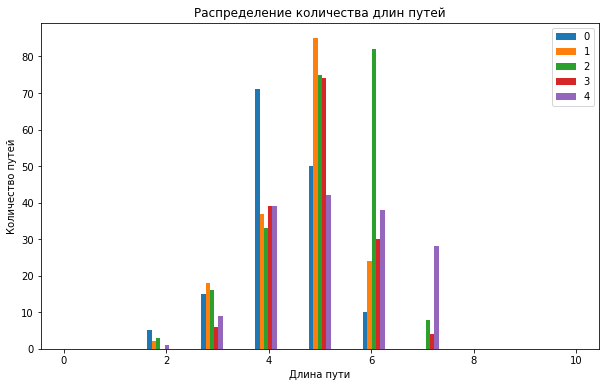

model_number      mean       std
0             0  4.298013  0.859653
1             1  4.668675  0.894350
2             2  5.110599  1.041413
3             3  4.915033  0.839761
4             4  5.216561  1.201477

In [37]:
xoodyak_paths_df = plot_paths(xoodyak_paths)
xoodyak_paths_df

In [38]:
xoodyak_paths_df["std"].describe()

count    5.000000
mean     0.967331
std      0.152895
min      0.839761
25%      0.859653
50%      0.894350
75%      1.041413
max      1.201477
Name: std, dtype: float64

# Исследования распределения коэффициента уверенности узлов

In [39]:
def plot_confidences(confidences):
    bins = np.linspace(0, 1, 30)

    hists = list()
    labels = list()
    for i, confidence in enumerate(confidences):
        conf = confidence["confidence"]
        display(f'{i}: mean={conf.mean()} std={conf.std()}')
        hists.append(conf)
        labels.append(i)
        
    plt.figure(figsize=(10,6))
    plt.hist(hists, bins, label=labels)
    plt.legend(loc='upper right')
    plt.show()

'0: mean=0.3523188405797102 std=0.2901578927550443'

'1: mean=0.20305555555555563 std=0.19114656929857932'

'2: mean=0.3153424657534247 std=0.27115535825519327'

'3: mean=0.30191176470588227 std=0.2768385345068206'

'4: mean=0.3723809523809526 std=0.28932465460165785'

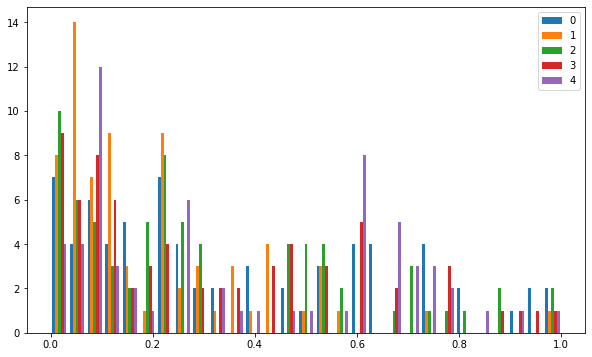

In [40]:
plot_confidences(ascon_weights)

In [41]:
def boxplot_confidences(confidences):
    bins = np.linspace(0, 1, 30)

    boxplots = list()
    rows = list()
    for i, confidence in enumerate(confidences):
        conf = confidence["confidence"]
        rows.append((i, conf.mean(), conf.std()))
        boxplots.append(conf)
        
    plt.figure(figsize=(10,6))
    plt.boxplot(boxplots)
    plt.legend(loc='upper right')
    plt.title("Распределение коэффициента уверенности узлов")
    plt.xlabel("Номер выборки")
    plt.ylabel("Коэффициент уверенности узла")
    plt.show()
    
    return pd.DataFrame(rows, columns=('model_number', 'mean', 'std'))

### ASCON

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


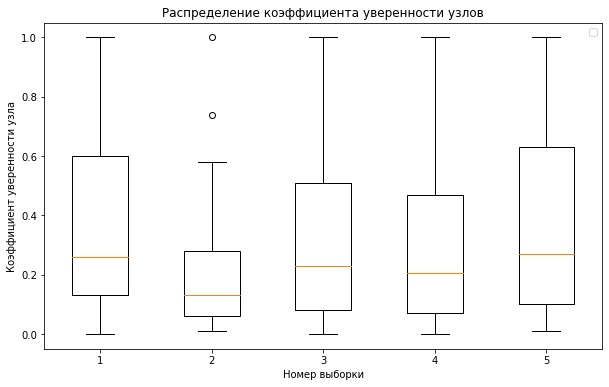

model_number      mean       std
0             0  0.352319  0.290158
1             1  0.203056  0.191147
2             2  0.315342  0.271155
3             3  0.301912  0.276839
4             4  0.372381  0.289325

In [42]:
ascon_confidences_df = boxplot_confidences(ascon_weights)
display(ascon_confidences_df)

### PHOTON Beetle

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


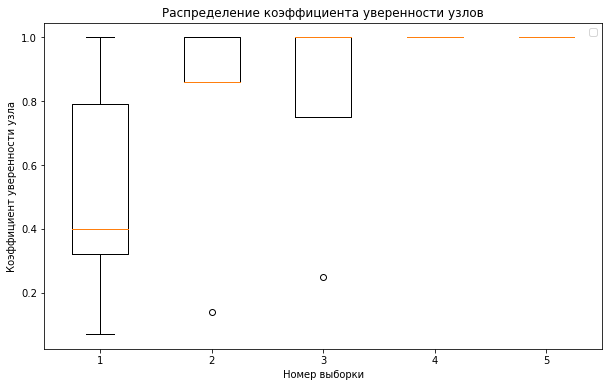

model_number      mean       std
0             0  0.518710  0.268499
1             1  0.883478  0.176084
2             2  0.880952  0.187401
3             3  1.000000  0.000000
4             4  1.000000  0.000000

In [43]:
photonbeetle_confidences_df = boxplot_confidences(photonbeetle_weights)
photonbeetle_confidences_df

### Romulus

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


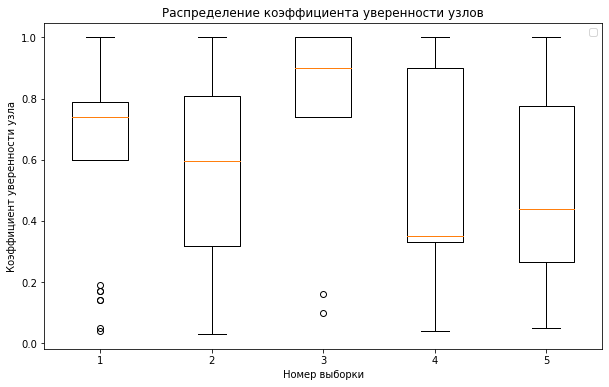

model_number      mean       std
0             0  0.659512  0.279329
1             1  0.556842  0.315159
2             2  0.848108  0.208084
3             3  0.542273  0.319118
4             4  0.516364  0.326219

In [44]:
romulus_confidences_df = boxplot_confidences(romulus_weights)
romulus_confidences_df

### SPARKLE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


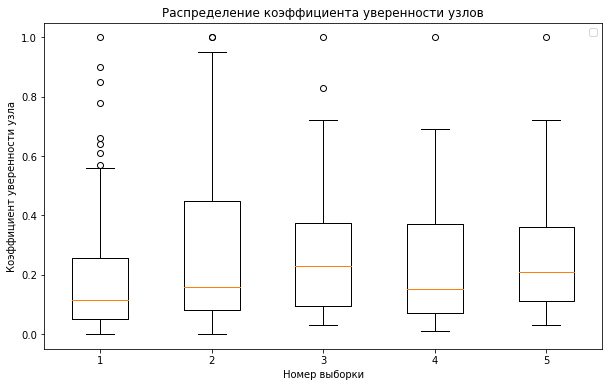

model_number      mean       std
0             0  0.215000  0.237367
1             1  0.287424  0.273216
2             2  0.278732  0.203603
3             3  0.228378  0.201902
4             4  0.277463  0.211103

In [45]:
sparkle_confidences_df = boxplot_confidences(sparkle_weights)
sparkle_confidences_df

### Xoodyak

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


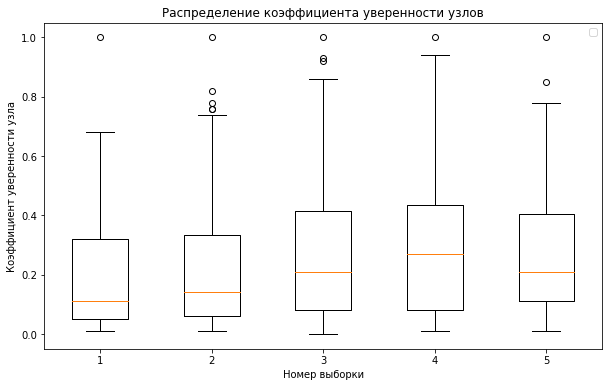

model_number      mean       std
0             0  0.200260  0.193370
1             1  0.237105  0.239782
2             2  0.284000  0.259219
3             3  0.299403  0.249131
4             4  0.271791  0.223640

In [46]:
xoodyak_confidences_df = boxplot_confidences(xoodyak_weights)
xoodyak_confidences_df

# Исследования распределения времени валидации узлов

In [47]:
def plot_valid_time(weights):
    plt.figure(figsize=(12,8))
    rows = list()
    for i, weight in enumerate(weights):
        diff = weight["time_edged"]-weight["time_creation"]
        plt.plot(weight["id"], diff, label=i)
        rows.append((i, diff.mean(), diff.std()))
    plt.title("Распределение времени валидации узлов")
    plt.ylabel("Время валидации(мс)")
    plt.xlabel("Номер транзакции")
    plt.legend()
    return pd.DataFrame(rows, columns=('model_number', 'mean', 'std'))

model_number          mean          std
0             0  11211.492754  4160.510852
1             1  10836.847222  4330.256625
2             2  10776.534247  3836.514590
3             3  10714.911765  3624.310754
4             4  10869.492063  4276.233747

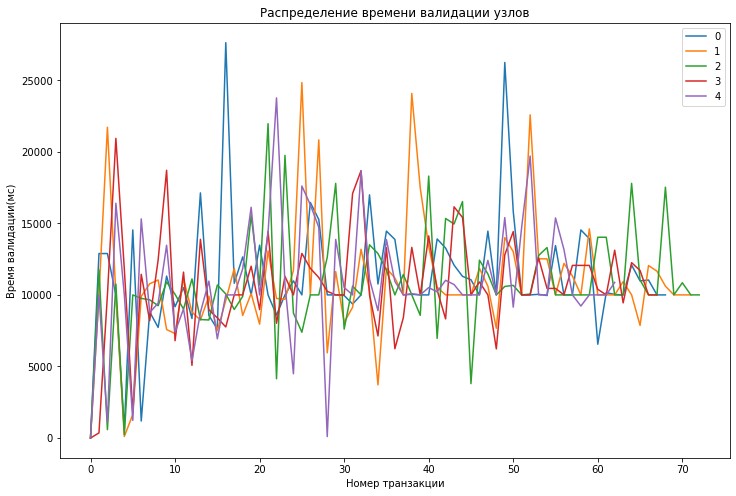

In [48]:
ascon_valid_time_df = plot_valid_time(ascon_weights)
ascon_valid_time_df

model_number          mean           std
0             0  16362.354839  15502.322591
1             1  17276.391304  16664.965769
2             2  19097.666667  17273.326904
3             3  24228.833333  27579.206799
4             4  18065.157895  14947.720864

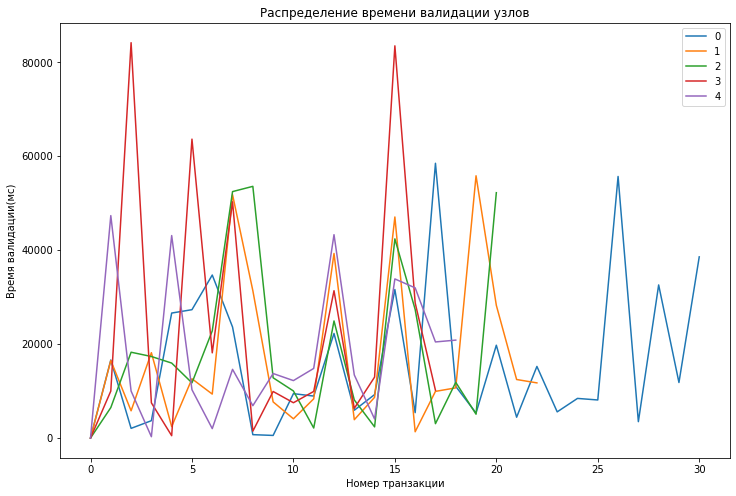

In [49]:
photonbeetle_valid_time_df = plot_valid_time(photonbeetle_weights)
photonbeetle_valid_time_df

In [50]:
romulus_valid_time_df = plot_valid_time(romulus_weights)
romulus_valid_time_df

model_number          mean           std
0             0  12135.268293   8516.739567
1             1  13567.263158  12965.842466
2             2  12686.891892   9055.823003
3             3  12300.931818   7851.142949
4             4  12210.159091   8596.153004

In [51]:
sparkle_valid_time_df = plot_valid_time(sparkle_weights)
sparkle_valid_time_df

model_number          mean          std
0             0  10684.540541  3218.711463
1             1  11128.712121  4643.150216
2             2  11042.830986  3780.573388
3             3  10885.324324  3523.572172
4             4  11363.582090  4958.393007

model_number          mean          std
0             0  10741.909091  3441.337134
1             1  10839.144737  2949.657660
2             2  10840.706667  3608.266641
3             3  10818.805970  4167.345832
4             4  11352.507463  4099.037172

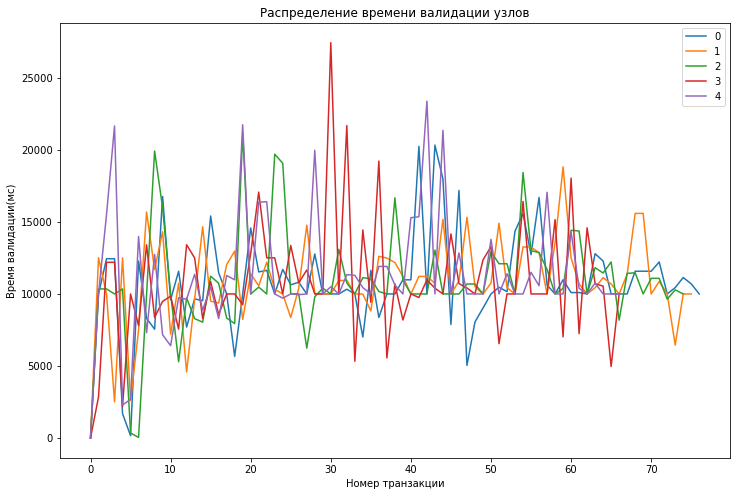

In [52]:
xoodyak_valid_time_df = plot_valid_time(xoodyak_weights)
xoodyak_valid_time_df

In [53]:
ascon_weights[0].describe()

id   agent_id         nonce  time_creation    time_edged  \
count  69.000000  69.000000  6.900000e+01   6.900000e+01  6.900000e+01   
mean   34.000000   1.855072  3.937175e+06   1.681322e+12  1.681322e+12   
std    20.062403   1.487945  4.062575e+06   1.935560e+04  2.038477e+04   
min     0.000000   0.000000  0.000000e+00   1.681322e+12  1.681322e+12   
25%    17.000000   0.000000  1.095880e+06   1.681322e+12  1.681322e+12   
50%    34.000000   2.000000  2.897963e+06   1.681322e+12  1.681322e+12   
75%    51.000000   3.000000  4.879651e+06   1.681322e+12  1.681322e+12   
max    68.000000   4.000000  2.334143e+07   1.681322e+12  1.681322e+12   

           weight  confidence           x          y  
count   69.000000   69.000000   69.000000  69.000000  
mean    18.971014    0.352319   63.187826  -1.901739  
std     55.709850    0.290158   33.037326   1.969686  
min      1.000000    0.000000    0.000000  -5.180000  
25%      2.000000    0.130000   36.470000  -3.760000  
50%      7.000000    0.260000   71.090000  -2.070000  
75%     18.000000    0.600000   89.520000   0.020000  
max    454.000000    1.000000  112.130000   0.920000

# Исследование агентов

### ASCON

In [54]:
ascon_weights[0][1:].groupby(['agent_id']).agg({"nonce": "describe"})

nonce                                                              \
         count          mean           std       min        25%        50%   
agent_id                                                                     
0         18.0  3.322573e+06  2.278869e+06  187947.0  2116562.5  3128919.0   
1         11.0  5.365120e+06  3.722902e+06  618621.0  2518889.5  3522527.0   
2         13.0  2.931355e+06  4.930008e+06   70224.0   289595.0  1051164.0   
3         13.0  4.124918e+06  2.978293e+06  765260.0  1810149.0  2897963.0   
4         13.0  4.700838e+06  5.995821e+06  547269.0  1640316.0  3401850.0   

                                  
                 75%         max  
agent_id                          
0         3844175.75   7933517.0  
1         8846694.50  10617836.0  
2         3009897.00  18345013.0  
3         6065974.00   9615007.0  
4         3784486.00  23341431.0

In [55]:
def plot_agents(weights):
    bins = np.linspace(0, 5, 10)

    tx_hists = list()
    labels = list()
    for i, weight in enumerate(weights):
        groups = weight.groupby('agent_id').groups
        txs = list()
        for k, v in groups.items():
            txs += (len(v) * [k])
        tx_hists.append(txs)
        labels.append(i)
        
    plt.figure(figsize=(10,6))
    plt.hist(tx_hists, bins, label=labels)
    plt.title("Распределение транзакций по агентам")
    plt.xlabel("Номер модели")
    plt.ylabel("Кол-во транзакций")
    plt.legend(loc='upper right')
    plt.show()

In [56]:
plot_agents(ascon_weights)

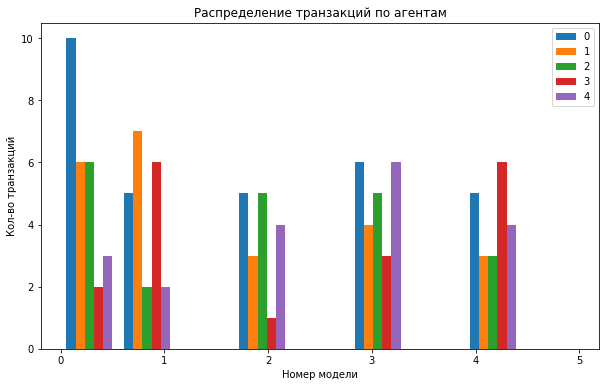

In [57]:
plot_agents(photonbeetle_weights)

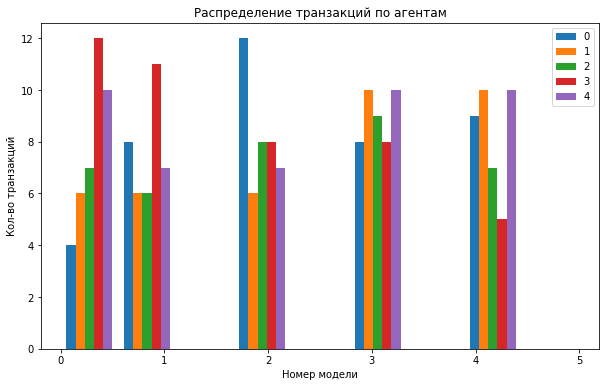

In [58]:
plot_agents(romulus_weights)

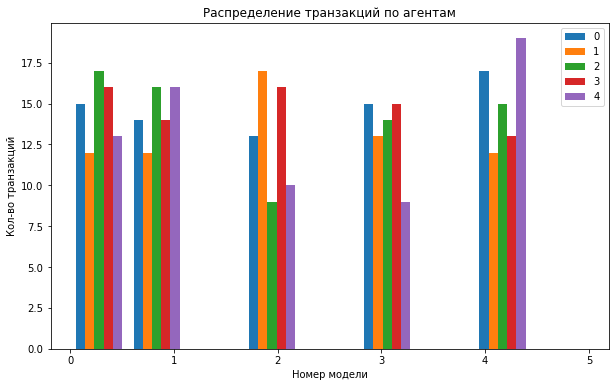

In [59]:
plot_agents(sparkle_weights)

In [60]:
plot_agents(xoodyak_weights)

In [61]:
ascon_weights[0][1:].groupby(['agent_id']).agg({"nonce": "sum"})

nonce
agent_id          
0         59806320
1         59016318
2         38107621
3         53623940
4         61110897

# Атаки

In [62]:
ascon_attack_path = "/Users/a.g.andreev/tangle-simulation/experiments/attacks/ascon"
ascon_attack_weights, ascon_attack_paths = get_exp_info(ascon_attack_path)

In [73]:
ascon_attack_weight = ascon_attack_weights[0]
ascon_attack_weight[ascon_attack_weight["agent_id"]==4][["id", "agent_id", "confidence"]].head()

id  agent_id  confidence
59  59         4        0.98
65  66         4        0.08
66  67         4        0.88
67  68         4        0.08
68  71         4        0.08

In [71]:
photonbeetle_attack_path = "/Users/a.g.andreev/tangle-simulation/experiments/attacks/photonbeetle"
photonbeetle_attack_weights, photonbeetle_attack_paths = get_exp_info(photonbeetle_attack_path)

In [74]:
photonbeetle_attack_weight = photonbeetle_attack_weights[0]
photonbeetle_attack_weight[photonbeetle_attack_weight["agent_id"]==4][["id", "agent_id", "confidence"]].head()

id  agent_id  confidence
15  15         4         1.0
16  16         4         1.0
17  18         4         1.0
19  21         4         1.0
23  25         4         1.0

In [75]:
romulus_attack_path = "/Users/a.g.andreev/tangle-simulation/experiments/attacks/romulus"
romulus_attack_weights, romulus_attack_paths = get_exp_info(romulus_attack_path)

In [76]:
romulus_attack_weight = romulus_attack_weights[0]
romulus_attack_weight[romulus_attack_weight["agent_id"]==4][["id", "agent_id", "confidence"]].head()

id  agent_id  confidence
38  38         4        1.00
41  42         4        1.00
42  44         4        1.00
43  46         4        1.00
44  47         4        0.84

In [78]:
sparkle_attack_path = "/Users/a.g.andreev/tangle-simulation/experiments/attacks/sparkle"
sparkle_attack_weights, sparkle_attack_paths = get_exp_info(sparkle_attack_path)

In [79]:
sparkle_attack_weight = sparkle_attack_weights[0]
sparkle_attack_weight[sparkle_attack_weight["agent_id"]==4][["id", "agent_id", "confidence"]].head()

id  agent_id  confidence
59  59         4        0.98
64  64         4        0.27
65  66         4        0.27
67  68         4        0.88
68  69         4        0.27

In [81]:
xoodyak_attack_path = "/Users/a.g.andreev/tangle-simulation/experiments/attacks/xoodyak"
xoodyak_attack_weights, xoodyak_attack_paths = get_exp_info(xoodyak_attack_path)

In [82]:
xoodyak_attack_weight = xoodyak_attack_weights[0]
xoodyak_attack_weight[xoodyak_attack_weight["agent_id"]==4][["id", "agent_id", "confidence"]].head()

id  agent_id  confidence
62  62         4        0.97
66  66         4        0.66
69  71         4        0.10
70  72         4        0.66
71  74         4        0.29